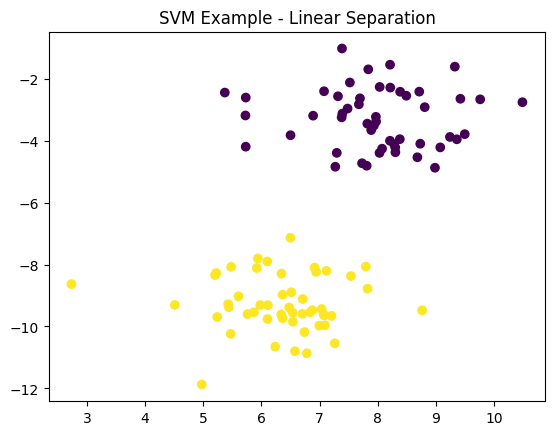

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# داده‌ی نمونه
# n_samples   = 10  یعنی ۱۰ تا نقطه (نمونه‌ی داده)
# centers     = 2   یعنی دو گروه یا دو کلاس داریم
# random_state= 6   فقط برای تکرارپذیر بودن داده‌هاست (یعنی هر بار یکسان تولید شن)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# چاپ داده‌ها
# print("X (ویژگی‌ها):")
# print(np.round(X, 2))   # با گرد کردن برای خوانایی بهتر
# print("\ny (برچسب‌ها):")
# print(y)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# مدل SVM
# kernel: (linear, rbf, poly, sigmoid, ...)  نوع تابع برای جدا کردن داده‌ها 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# نمایش داده‌ها
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("SVM Example - Linear Separation")
plt.show()


X:
 [[  8.22  -2.29]
 [  5.43  -9.28]
 [  7.48  -2.96]
 [  7.93  -3.52]
 [  7.3   -4.39]
 [  5.73  -2.61]
 [  7.97  -3.23]
 [  6.7   -9.59]
 [  7.84  -1.7 ]
 [  7.69  -2.63]
 [  6.36  -8.97]
 [  9.24  -3.88]
 [  9.08  -4.22]
 [  7.12  -8.2 ]
 [  5.22  -8.27]
 [  8.21  -4.  ]
 [  6.94  -8.24]
 [  6.54  -9.85]
 [  9.42  -2.65]
 [  5.98  -9.31]
 [  5.2   -8.34]
 [  8.08  -4.26]
 [  7.81  -4.81]
 [  8.03  -2.27]
 [  7.21  -9.66]
 [  6.36  -9.73]
 [  6.48  -9.39]
 [  8.71  -2.42]
 [  6.54  -9.56]
 [  6.84  -9.54]
 [  5.47 -10.24]
 [  6.5   -7.14]
 [  8.39  -2.42]
 [  6.34  -9.61]
 [  6.34  -8.29]
 [  7.52  -2.12]
 [  6.91  -8.1 ]
 [  7.08  -9.64]
 [  7.38  -3.25]
 [  4.51  -9.31]
 [  7.09  -9.96]
 [  8.98  -4.87]
 [  6.71  -9.11]
 [  8.73  -4.1 ]
 [  5.72  -3.19]
 [  8.3   -4.38]
 [  9.36  -3.96]
 [  8.38  -3.95]
 [  7.27  -4.84]
 [  9.5   -3.79]
 [  5.94  -7.8 ]
 [  6.78 -10.86]
 [  7.73  -4.73]
 [  7.08  -2.4 ]
 [  7.83  -8.78]
 [  6.5   -3.82]
 [  6.11  -9.31]
 [  7.68  -2.83]
 [  8.28  

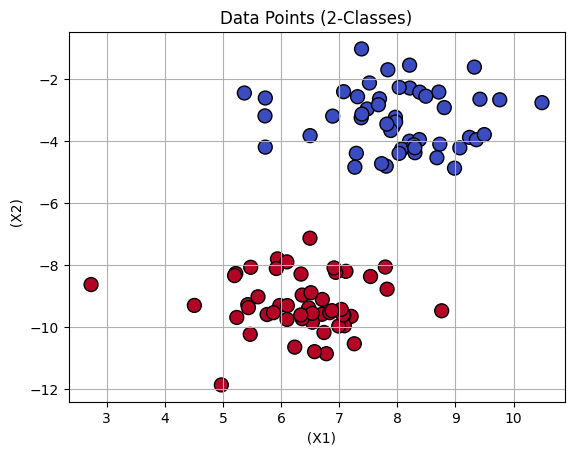

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# ساخت داده‌ی مصنوعی
X, y = datasets.make_blobs(n_samples=10, centers=2, random_state=6)

# چاپ برای بررسی
print("X:\n", np.round(X, 2))
print("\ny:\n", y)

# رسم نقاط روی نمودار
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel("  (X1)")
plt.ylabel("  (X2)")
plt.title("Data Points (2-Classes)")
plt.grid(True)
plt.show()
